### 二項分布（Binomial distribution）は離散分布の一種です

まずは例題

プレイヤーAとプレイヤーBの2人が、バスケットボールをします。Aは1ゲームで平均11回シュートをして、平均的な成功率は72％です。一方、Bは15回シュートをしますが、平均的に48%しか決まりません。

問1: プレイヤーAが平均的な1試合で6回シュートを決める確率は？

問2: おなじく、プレイヤーBが1試合で6回シュートを決める確率は？

以下の条件が満たされれば、この問題を二項分布を使って考える事ができます。
    
    1.) 全体がn回の連続した試行からなる
    2.) それぞれの試行は、相互に排他的な2つの事象からなる（例えば成功と失敗）
    3.) 成功の確率がpならば、失敗の確率は1-p
    4.) それぞれの試行は独立
    


二項分布の確率質量関数は、以下のようになります。

$$Pr(X=k)=C(n,k)p^k (1-p)^{n-k}$$

nは試行の回数、kは成功の数、pは成功の確率、1-pは失敗の確率ですが、しばしばqと書かれます。

n回試行して、k回成功する確率は、$$p^k$$ 
また、n-k回失敗する確率は$$(1-p)^{n-k}$$
n回の試行で、k回の成功がどこにくるかわかりませんが、この並べ方は $$C(n,k)$$ 通りあります。
これらをすべて掛け合わせれば、n回中k回成功する確率が求まるわけです。

--------------------------------------------------------------------------------------------------------------------------------

C(n,k) は組み合わせです。実際の計算は次のような式で表現できます。

$$C(n,k) =  \frac{n!}{k!(n-k)!}$$

### 例題を解いてみましょう

In [20]:
# Aの成功率
p_A = .72
# シュートの数
n_A = 11

# 成功数
k = 6

# 組み合わせを求めるため
import scipy.misc as sc

comb_A = sc.comb(n_A,k)

# これらを掛け合わせれば、確率がでます。
answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))

# パーセントで結果を格納しておきます。
answer_A = 100*answer_A

# Bも同様の計算ができます。
p_B = .48
n_B = 15
comb_B = sc.comb(n_B,k)
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

print('プレイヤーAが平均的な試合で6回シュートを決める確率は{:0.2f}% '.format(answer_A))
print('')
print('プレイヤーBが平均的な試合で6回シュートを決める確率は{:0.2f}%'.format(answer_B))

プレイヤーAが平均的な試合で6回シュートを決める確率は11.08% 

プレイヤーBが平均的な試合で6回シュートを決める確率は17.02%


下手なシュートも数打ちゃあたる、ようにみえます。

では次に、9回決める確率を計算してみましょう。

In [21]:
# 9回決めなければなりません。
k = 9

comb_A = sc.comb(n_A,k)
comb_B = sc.comb(n_B,k)

# 掛け合わせます。
answer_A = 100 * comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

print('プレイヤーAが平均的な試合で9回シュートを決める確率は{:0.2f}% '.format(answer_A))
print('')
print('プレイヤーBが平均的な試合で9回シュートを決める確率は{:0.2f}%'.format(answer_B))

プレイヤーAが平均的な試合で9回シュートを決める確率は22.42% 

プレイヤーBが平均的な試合で9回シュートを決める確率は13.38%


9回決める確率が高いのは、やはり上手なAのほうです。
ここで注意しなければいけないのは、いま考えて居るのは、9回決める確率であって、少なくとも9回決める確率ではないということです。

#### 平均と分散

二項分布の平均は単純です。 $$\mu=n*p$$

これは直感的にもわかりやすいでしょう。平均的な成功率と試行の回数を掛ければ平均的な成功の回数になります。

標準偏差（分散の平方根）は次の式で求められます。$$\sigma=\sqrt{n*q*p}$$

シュートが決まる回数の平均と、+/- 標準偏差を計算できます。

In [22]:
# 平均値です。
mu_A = n_A *p_A
mu_B = n_B *p_B

# 標準偏差を計算しましょう。
sigma_A = ( n_A *p_A*(1-p_A) )**0.5
sigma_B = ( n_B *p_B*(1-p_B) )**0.5

print('プレイヤーAは1試合で、平均{:0.1f}回±{:0.1f}シュートを決めます。'.format(mu_A,sigma_A))
print('\n')
print('プレイヤーBは1試合で、平均{:0.1f}回±{:0.1f}シュートを決めます。'.format(mu_B,sigma_B))

プレイヤーAは1試合で、平均7.9回±1.5シュートを決めます。


プレイヤーBは1試合で、平均7.2回±1.9シュートを決めます。


#### scipyを利用できます

In [12]:
from scipy.stats import binom

mean,var= binom.stats(n_A,p_A)

print(mean)
print(var**0.5)

7.92
1.48916083752


#### 確率質量関数も求められます

コインを10回投げて裏と表を出すことを考えてみましょう。

In [15]:
import numpy as np

# 10回と、表の確率0.5をセットします。
n=10
p=0.5

x = range(n+1)

# 二項分布の確率質量関数をから、実際の確率を計算できます。
Y = binom.pmf(x,n,p)

Y

array([ 0.00097656,  0.00976563,  0.04394531,  0.1171875 ,  0.20507813,
        0.24609375,  0.20507813,  0.1171875 ,  0.04394531,  0.00976563,
        0.00097656])

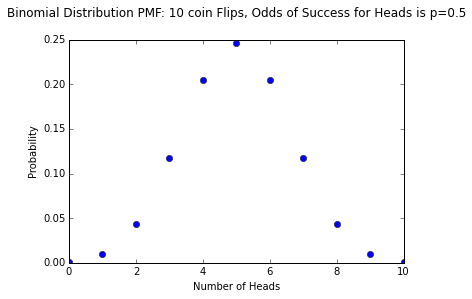

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# プロットします。
plt.plot(x,Y,'o')

# y=1.08はタイトルが少し上に行くようにするためです。
plt.title('Binomial Distribution PMF: 10 coin Flips, Odds of Success for Heads is p=0.5',y=1.08)

#軸にもタイトルが付けられます。
plt.xlabel('Number of Heads')
plt.ylabel('Probability')

2,3は英語ですが、Web上にも情報がありますので、参考にしてみてください。

1.) https://ja.wikipedia.org/wiki/%E4%BA%8C%E9%A0%85%E5%88%86%E5%B8%83

2.) http://stattrek.com/probability-distributions/binomial.aspx

3.) http://mathworld.wolfram.com/BinomialDistribution.html